In [1]:
import numpy as np
import pandas as pd     
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns    
from pandas.api.types import CategoricalDtype
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error

In [2]:
df = pd.read_csv("latimes-county-totals.csv")

In [3]:
df.head()

,date,county,fips,confirmed_cases,deaths,new_confirmed_cases,new_deaths
0,2020-01-26,Alameda,1,0,0,NaN,NaN
1,2020-01-31,Alameda,1,0,0,0.0,0.0
2,2020-02-02,Alameda,1,0,0,0.0,0.0
3,2020-02-20,Alameda,1,0,0,0.0,0.0
4,2020-02-21,Alameda,1,0,0,0.0,0.0


In [4]:
# df.describe()

In [5]:
# df.info()

In [6]:
df_la = df[df['county'] == 'Los Angeles']

In [7]:
print(df_la)

           date       county  fips  confirmed_cases  deaths  \
867  2020-01-26  Los Angeles    37                1       0   
868  2020-01-27  Los Angeles    37                1       0   
869  2020-01-28  Los Angeles    37                1       0   
870  2020-01-29  Los Angeles    37                1       0   
871  2020-01-30  Los Angeles    37                1       0   
..          ...          ...   ...              ...     ...   
962  2020-04-30  Los Angeles    37            23233    1119   
963  2020-05-01  Los Angeles    37            24262    1174   
964  2020-05-02  Los Angeles    37            24936    1212   
965  2020-05-03  Los Angeles    37            25699    1231   
966  2020-05-04  Los Angeles    37            26238    1260   

     new_confirmed_cases  new_deaths  
867                  NaN         NaN  
868                  0.0         0.0  
869                  0.0         0.0  
870                  0.0         0.0  
871                  0.0         0.0  
..       

In [8]:
days = list(range(1,len(df_la)+1))
len(days)

100

In [9]:
df_la['culm_day'] = days
#print(df_la)

# df_la = df_la.loc[df_la.culm_day == df_la.date].copy()


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [10]:
df_la

,date,county,fips,confirmed_cases,deaths,new_confirmed_cases,new_deaths,culm_day
867,2020-01-26,Los Angeles,37,1,0,NaN,NaN,1
868,2020-01-27,Los Angeles,37,1,0,0.0,0.0,2
869,2020-01-28,Los Angeles,37,1,0,0.0,0.0,3
870,2020-01-29,Los Angeles,37,1,0,0.0,0.0,4
871,2020-01-30,Los Angeles,37,1,0,0.0,0.0,5
...,...,...,...,...,...,...,...,...
962,2020-04-30,Los Angeles,37,23233,1119,711.0,54.0,96
963,2020-05-01,Los Angeles,37,24262,1174,1029.0,55.0,97
964,2020-05-02,Los Angeles,37,24936,1212,674.0,38.0,98
965,2020-05-03,Los Angeles,37,25699,1231,763.0,19.0,99


In [11]:
df_la.columns

Index(['date', 'county', 'fips', 'confirmed_cases', 'deaths',
       'new_confirmed_cases', 'new_deaths', 'culm_day'],
      dtype='object')

In [12]:
df_la = df_la.drop(labels=['date','county','fips'], axis=1)
# print (df_la.info())
# df_la.describe()

In [13]:
df_la

,confirmed_cases,deaths,new_confirmed_cases,new_deaths,culm_day
867,1,0,NaN,NaN,1
868,1,0,0.0,0.0,2
869,1,0,0.0,0.0,3
870,1,0,0.0,0.0,4
871,1,0,0.0,0.0,5
...,...,...,...,...,...
962,23233,1119,711.0,54.0,96
963,24262,1174,1029.0,55.0,97
964,24936,1212,674.0,38.0,98
965,25699,1231,763.0,19.0,99


In [14]:
# df_la.dropna(inplace=True)
df_la = df_la.fillna(0)

In [15]:
df_la

,confirmed_cases,deaths,new_confirmed_cases,new_deaths,culm_day
867,1,0,0.0,0.0,1
868,1,0,0.0,0.0,2
869,1,0,0.0,0.0,3
870,1,0,0.0,0.0,4
871,1,0,0.0,0.0,5
...,...,...,...,...,...
962,23233,1119,711.0,54.0,96
963,24262,1174,1029.0,55.0,97
964,24936,1212,674.0,38.0,98
965,25699,1231,763.0,19.0,99


In [16]:
X = df_la.drop(labels=['confirmed_cases'], axis=1)
print (X)
y = df_la.loc[:,'confirmed_cases']
print (y)
print (y.unique())
X_col_names = X.columns.values
X_col_names

     deaths  new_confirmed_cases  new_deaths  culm_day
867       0                  0.0         0.0         1
868       0                  0.0         0.0         2
869       0                  0.0         0.0         3
870       0                  0.0         0.0         4
871       0                  0.0         0.0         5
..      ...                  ...         ...       ...
962    1119                711.0        54.0        96
963    1174               1029.0        55.0        97
964    1212                674.0        38.0        98
965    1231                763.0        19.0        99
966    1260                539.0        29.0       100

[100 rows x 4 columns]
867        1
868        1
869        1
870        1
871        1
       ...  
962    23233
963    24262
964    24936
965    25699
966    26238
Name: confirmed_cases, Length: 100, dtype: int64
[    1     7    11    13    14    19    20    29    32    40    54    69
    94   147   192   231   295   353   411   543   

array(['deaths', 'new_confirmed_cases', 'new_deaths', 'culm_day'],
      dtype=object)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print(X_train)
print(len(X_train),len(y_train))
print(len(X_test),len(y_test))

     deaths  new_confirmed_cases  new_deaths  culm_day
934      80                543.0        14.0        68
966    1260                539.0        29.0       100
921       2                 64.0         0.0        55
962    1119                711.0        54.0        96
955     798               1118.0        66.0        89
..      ...                  ...         ...       ...
942     244                469.0        19.0        76
876       0                  0.0         0.0        10
939     173                553.0        26.0        73
879       0                  0.0         0.0        13
904       0                  0.0         0.0        38

[70 rows x 4 columns]
70 70
30 30


In [18]:
# print (X_test)
# min_max_scaler = MinMaxScaler()
# X_train_minmax = min_max_scaler.fit_transform(X_train)
# X_test_minmax = min_max_scaler.transform(X_test)
# X_test_minmax 

In [19]:
df_la['culm_day']

867      1
868      2
869      3
870      4
871      5
      ... 
962     96
963     97
964     98
965     99
966    100
Name: culm_day, Length: 100, dtype: int64

## RBF


In [20]:
C_range = 10.0 ** np.arange(-2, 4)
gamma_range = [.01, .1, 1, 'auto', 10, 100]
print (gamma_range)
param_grid = dict(gamma=gamma_range, C=C_range)
param_grid

[0.01, 0.1, 1, 'auto', 10, 100]


{'gamma': [0.01, 0.1, 1, 'auto', 10, 100],
 'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])}

In [21]:
vr = GridSearchCV(SVR(kernel='rbf'),param_grid=param_grid)

In [22]:
vr.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'gamma': [0.01, 0.1, 1, 'auto', 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [23]:
vr.best_estimator_

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [24]:
svr_rbf = SVR(kernel='rbf', C= 1000, gamma = 0.01,degree = 3,epsilon=0.1,cache_size = 200, coef0=0.0, max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [25]:
svr_rbf.fit(X_train,y_train)

SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [26]:
y_predict = svr_rbf.predict(X_test)
# y_predict
len(y_test)

30

ValueError: x and y must be the same size

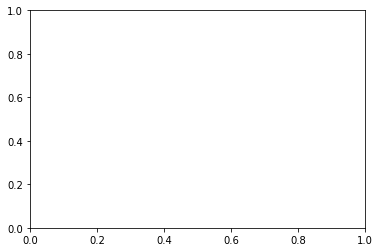

In [27]:
plt.scatter(X_test, y_test, color='darkorange', label='data')
# plt.plot(X_test, y_predict, color='navy', label='RBF model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

In [ ]:
svr_rbf = SVR(kernel='rbf', C= 100, gamma = 0.1)

In [ ]:
svr_rbf.fit(X_train,y_train)

In [ ]:
y_predict = svr_rbf.predict(X_test)
y_predict

In [ ]:
#evaluate model using mse
mse = mean_squared_error(y_test,y_predict)
#root mean square
rmse= np.sqrt(mse)
rmse

# Linear

In [ ]:
svr_linear = SVR(kernel='linear', C= 100, gamma = 'auto')

In [ ]:
svr_linear.fit(X_train,y_train)

In [ ]:
y_predict = svr_linear.predict(X_test)
y_predict

In [ ]:
#evaluate model using mse
mse = mean_squared_error(y_test,y_predict)
#root mean square
rmse= np.sqrt(mse)
rmse

# Polynomial


In [ ]:
svr_poly = SVR(kernel='poly', C= 100, gamma = 'auto',degree = 2)

In [ ]:
svr_poly.fit(X_train,y_train)

In [ ]:
y_predict = svr_poly.predict(X_test)
y_predict


In [ ]:
#evaluate model using mse
mse = mean_squared_error(y_test,y_predict)
#root mean square
rmse= np.sqrt(mse)
rmse